In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1=pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")

In [3]:
id=data1.pop("id")

In [4]:
data1

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [5]:
data1.shape

(20758, 17)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [7]:
data1.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
list(data1.columns)[0]

'Gender'

In [9]:
counter=0
for i in data1.columns:
    if data1[i].unique().size<=10:
      print(list(data1.columns)[counter],':',data1[i].unique())
    counter+=1
    

Gender : ['Male' 'Female']
family_history_with_overweight : ['yes' 'no']
FAVC : ['yes' 'no']
CAEC : ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE : ['no' 'yes']
SCC : ['no' 'yes']
CALC : ['Sometimes' 'no' 'Frequently']
MTRANS : ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
NObeyesdad : ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [10]:
data1.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


<Axes: xlabel='MTRANS', ylabel='Weight'>

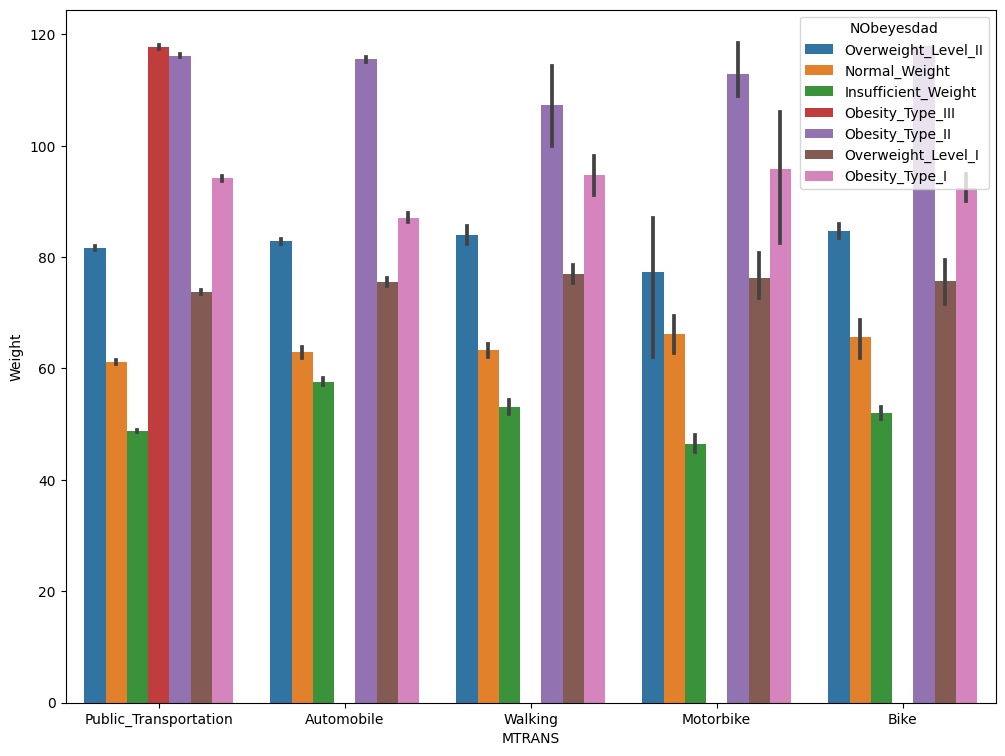

In [11]:
plt.figure(figsize=(12,9))
sns.barplot(x=data1.MTRANS,y=data1.Weight,hue=data1.NObeyesdad)

Text(0.5, 1.0, 'ScatterPlot-Showing clusters')

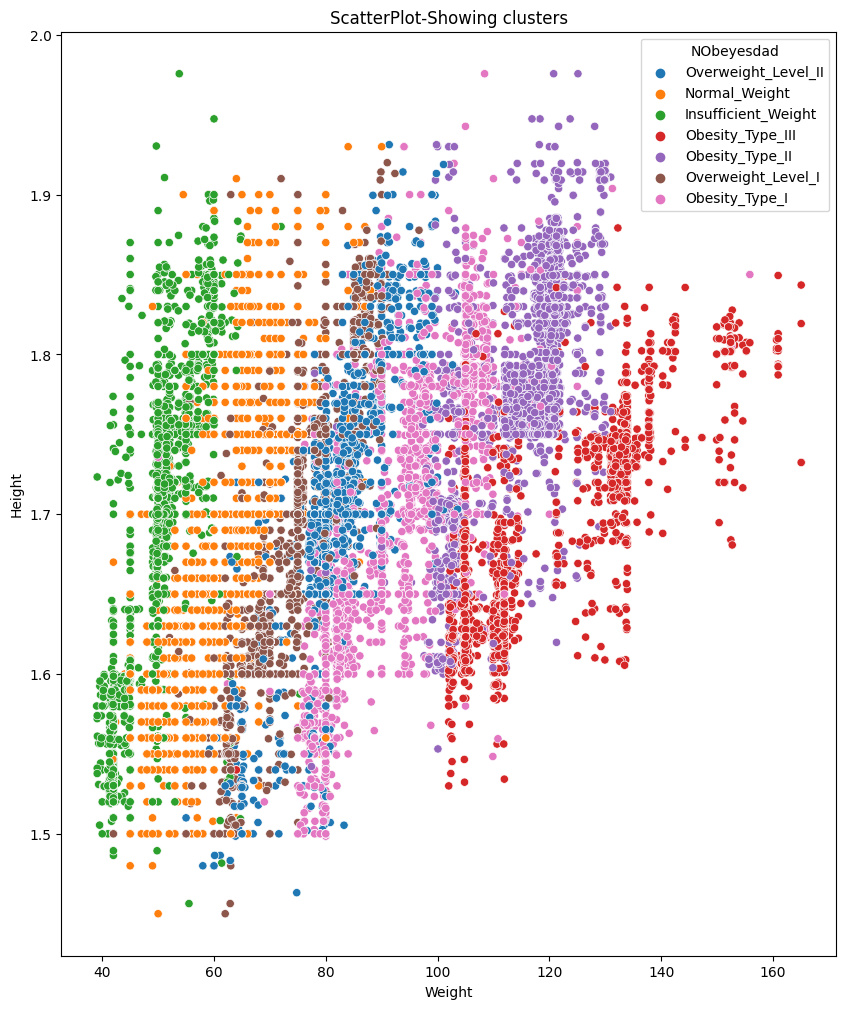

In [12]:
plt.figure(figsize=(10,12))
sns.scatterplot(x=data1.Weight,y=data1.Height,hue=data1.NObeyesdad)
plt.title("ScatterPlot-Showing clusters")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Frequency'>

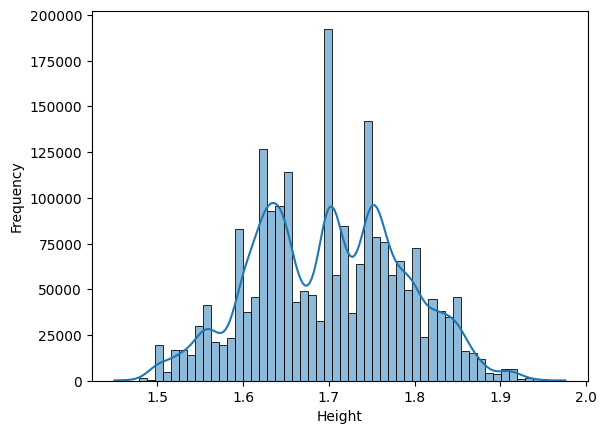

In [13]:
sns.histplot(data=data1.Height,kde=True,stat="frequency")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Probability'>

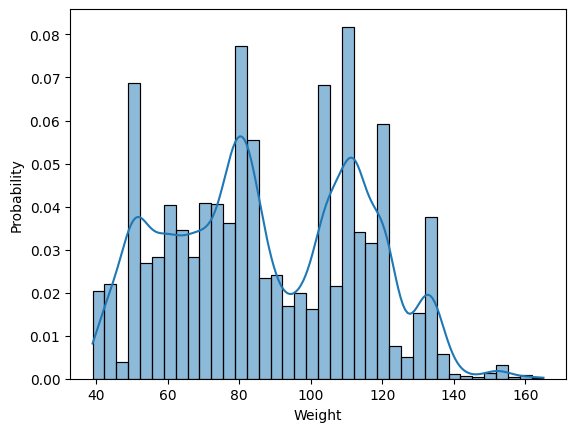

In [14]:
sns.histplot(data=data1.Weight,kde=True,stat="probability")

(array([ 494.,  261.,  186.,  468., 8563.,  694.,  832., 1602., 7658.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25]),
 <BarContainer object of 9 artists>)

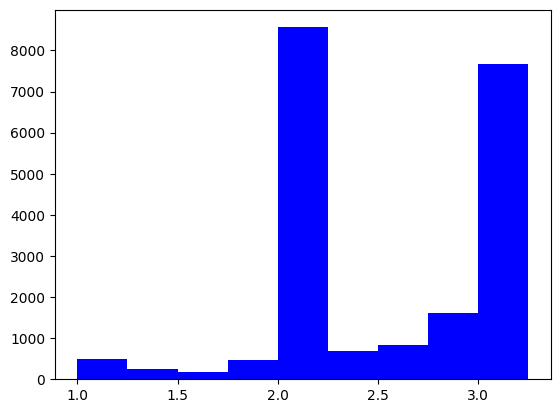

In [15]:
plt.hist(data1.FCVC,bins=np.arange(1,3.5,0.25),color="blue")

## One-Hot Encoding For Nominal Features


In [16]:
new=pd.get_dummies(data=data1,columns=["family_history_with_overweight","Gender","SMOKE","SCC","FAVC"],drop_first=True)
new

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad,family_history_with_overweight_yes,Gender_Male,SMOKE_yes,SCC_yes,FAVC_yes
0,24.443011,1.699998,81.669950,2.000000,2.983297,Sometimes,2.763573,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,True,True,False,False,True
1,18.000000,1.560000,57.000000,2.000000,3.000000,Frequently,2.000000,1.000000,1.000000,no,Automobile,Normal_Weight,True,False,False,False,True
2,18.000000,1.711460,50.165754,1.880534,1.411685,Sometimes,1.910378,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,True,False,False,False,True
3,20.952737,1.710730,131.274851,3.000000,3.000000,Sometimes,1.674061,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,True,False,False,False,True
4,31.641081,1.914186,93.798055,2.679664,1.971472,Sometimes,1.979848,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,Sometimes,2.151809,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,True,True,False,False,True
20754,18.000000,1.710000,50.000000,3.000000,4.000000,Frequently,1.000000,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,False,True,False,False,True
20755,20.101026,1.819557,105.580491,2.407817,3.000000,Sometimes,2.000000,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,True,True,False,False,True
20756,33.852953,1.700000,83.520113,2.671238,1.971472,Sometimes,2.144838,0.000000,0.973834,no,Automobile,Overweight_Level_II,True,True,False,False,True


## Label Encoding of Ordinal Variables

In [17]:
Gender : ['Male' 'Female']
family_history_with_overweight : ['yes' 'no']
FAVC : ['yes' 'no']
CAEC : ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE : ['no' 'yes']
SCC : ['no' 'yes']
CALC : ['Sometimes' 'no' 'Frequently']
MTRANS : ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
NObeyesdad : ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']

In [18]:
new.MTRANS.replace({"Public_Transportation":1,"Automobile":0,"Walking":2,"Motorbike":3,"Bike":4},inplace=True)
new.CAEC.replace({"Sometimes":0,"Frequently":1,"no":2,"Always":3},inplace=True)
new.CALC.replace({"Sometimes":0,"Frequently":1,"no":2},inplace=True)
new.NObeyesdad.replace({'Overweight_Level_II':0, 'Normal_Weight':1, 'Insufficient_Weight':2,'Obesity_Type_III':3, 'Obesity_Type_II':4, 'Overweight_Level_I':5,'Obesity_Type_I':6},inplace=True)
new

/tmp/ipykernel_19/2936592203.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new.MTRANS.replace({"Public_Transportation":1,"Automobile":0,"Walking":2,"Motorbike":3,"Bike":4},inplace=True)
/tmp/ipykernel_19/2936592203.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new.MTRANS.replace({"Public

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad,family_history_with_overweight_yes,Gender_Male,SMOKE_yes,SCC_yes,FAVC_yes
0,24.443011,1.699998,81.669950,2.000000,2.983297,0,2.763573,0.000000,0.976473,0,1,0,True,True,False,False,True
1,18.000000,1.560000,57.000000,2.000000,3.000000,1,2.000000,1.000000,1.000000,2,0,1,True,False,False,False,True
2,18.000000,1.711460,50.165754,1.880534,1.411685,0,1.910378,0.866045,1.673584,2,1,2,True,False,False,False,True
3,20.952737,1.710730,131.274851,3.000000,3.000000,0,1.674061,1.467863,0.780199,0,1,3,True,False,False,False,True
4,31.641081,1.914186,93.798055,2.679664,1.971472,0,1.979848,1.967973,0.931721,0,1,0,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,0,2.151809,1.330519,0.196680,0,1,4,True,True,False,False,True
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1,1.000000,2.000000,1.000000,0,1,2,False,True,False,False,True
20755,20.101026,1.819557,105.580491,2.407817,3.000000,0,2.000000,1.158040,1.198439,2,1,4,True,True,False,False,True
20756,33.852953,1.700000,83.520113,2.671238,1.971472,0,2.144838,0.000000,0.973834,2,0,0,True,True,False,False,True


## Scalling of the data


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
new[["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]]=scaler.fit_transform(new[["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]])
new

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad,family_history_with_overweight_yes,Gender_Male,SMOKE_yes,SCC_yes,FAVC_yes
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,0,1.206594,-1.171141,0.597438,0,1,0,True,True,False,False,True
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,1,-0.048349,0.021775,0.636513,2,0,1,True,False,False,False,True
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,0,-0.195644,-0.138022,1.755239,2,1,2,True,False,False,False,True
3,-0.507929,0.120090,1.644770,1.039171,0.338364,0,-0.584035,0.579896,0.271455,0,1,3,True,False,False,False,True
4,1.371197,2.450367,0.224054,0.438397,-1.119801,0,-0.081469,1.176486,0.523111,0,1,0,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.227725,0.760293,0.996987,0.888355,0.338364,0,0.201151,0.416056,-0.697686,0,1,4,True,True,False,False,True
20754,-1.027052,0.111729,-1.436296,1.039171,1.756085,1,-1.691863,1.214691,0.636513,0,1,2,False,True,False,False,True
20755,-0.657669,1.366537,0.670717,-0.071439,0.338364,0,-0.048349,0.210303,0.966092,2,1,4,True,True,False,False,True
20756,1.760067,-0.002805,-0.165574,0.422594,-1.119801,0,0.189694,-1.171141,0.593055,2,0,0,True,True,False,False,True


## Splitting Data

In [20]:
new_y=new.pop("NObeyesdad")
new_x=new.copy(deep=True)

In [21]:
new_y

0        0
1        1
2        2
3        3
4        0
        ..
20753    4
20754    2
20755    4
20756    0
20757    4
Name: NObeyesdad, Length: 20758, dtype: int64

In [22]:
new_x

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,family_history_with_overweight_yes,Gender_Male,SMOKE_yes,SCC_yes,FAVC_yes
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,0,1.206594,-1.171141,0.597438,0,1,True,True,False,False,True
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,1,-0.048349,0.021775,0.636513,2,0,True,False,False,False,True
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,0,-0.195644,-0.138022,1.755239,2,1,True,False,False,False,True
3,-0.507929,0.120090,1.644770,1.039171,0.338364,0,-0.584035,0.579896,0.271455,0,1,True,False,False,False,True
4,1.371197,2.450367,0.224054,0.438397,-1.119801,0,-0.081469,1.176486,0.523111,0,1,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.227725,0.760293,0.996987,0.888355,0.338364,0,0.201151,0.416056,-0.697686,0,1,True,True,False,False,True
20754,-1.027052,0.111729,-1.436296,1.039171,1.756085,1,-1.691863,1.214691,0.636513,0,1,False,True,False,False,True
20755,-0.657669,1.366537,0.670717,-0.071439,0.338364,0,-0.048349,0.210303,0.966092,2,1,True,True,False,False,True
20756,1.760067,-0.002805,-0.165574,0.422594,-1.119801,0,0.189694,-1.171141,0.593055,2,0,True,True,False,False,True


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(new_x, new_y, test_size=(0.2),random_state=42)

## Pipelining

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
pipe=Pipeline([("feature_engineering",PolynomialFeatures(degree=3)),
               ("Model",LogisticRegression(solver="lbfgs",multi_class="multinomial",max_iter=1000))])
pipe.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('feature_engineering', PolynomialFeatures(degree=3)),
                ('Model',
                 LogisticRegression(max_iter=1000, multi_class='multinomial'))])>

In [25]:
pipe.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('feature_engineering', PolynomialFeatures(degree=3)),
                ('Model',
                 LogisticRegression(max_iter=1000, multi_class='multinomial'))])

In [26]:
pipe.score(x_train,y_train)

0.9302661688546309

In [27]:
pipe.score(x_cv,y_cv)

0.8569364161849711

## cleaning of test_data

In [28]:
test1=pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

In [29]:
id=test1.pop("id")

In [30]:
test1.MTRANS.replace({"Public_Transportation":1,"Automobile":0,"Walking":2,"Motorbike":3,"Bike":4},inplace=True)
test1.CAEC.replace({"Sometimes":0,"Frequently":1,"no":2,"Always":3},inplace=True)
test1.CALC.replace({"Sometimes":0,"Frequently":1,"no":2,"Always":3},inplace=True)
test1

/tmp/ipykernel_19/1613235254.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test1.MTRANS.replace({"Public_Transportation":1,"Automobile":0,"Walking":2,"Motorbike":3,"Bike":4},inplace=True)
/tmp/ipykernel_19/1613235254.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test1.MTRANS.replace({"Pu

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,0,no,2.825629,no,0.855400,0.000000,0,1
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,0,no,3.000000,no,1.000000,0.000000,0,1
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,0,no,2.621877,no,0.000000,0.250502,0,1
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,0,no,2.786417,no,0.094851,0.000000,0,1
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,0,no,2.653531,no,0.000000,0.741069,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,0,no,1.000000,no,0.807076,0.778632,0,1
13836,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,0,no,2.000000,no,0.000000,0.000000,0,1
13837,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,1,no,2.000000,no,1.949840,1.000000,0,1
13838,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,0,no,2.000000,no,3.000000,2.000000,2,1


In [31]:
test1=pd.get_dummies(data=test1,columns=["family_history_with_overweight","Gender","SMOKE","SCC","FAVC"],drop_first=True)
test1

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,family_history_with_overweight_yes,Gender_Male,SMOKE_yes,SCC_yes,FAVC_yes
0,26.899886,1.848294,120.644178,2.938616,3.000000,0,2.825629,0.855400,0.000000,0,1,True,True,False,False,True
1,21.000000,1.600000,66.000000,2.000000,1.000000,0,3.000000,1.000000,0.000000,0,1,True,False,False,False,True
2,26.000000,1.643355,111.600553,3.000000,3.000000,0,2.621877,0.000000,0.250502,0,1,True,False,False,False,True
3,20.979254,1.553127,103.669116,2.000000,2.977909,0,2.786417,0.094851,0.000000,0,1,True,True,False,False,True
4,26.000000,1.627396,104.835346,3.000000,3.000000,0,2.653531,0.000000,0.741069,0,1,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,23.327836,1.721384,78.030383,2.813234,3.000000,0,1.000000,0.807076,0.778632,0,1,True,True,False,False,False
13836,29.000000,1.590000,62.000000,3.000000,3.000000,0,2.000000,0.000000,0.000000,0,1,False,False,False,False,True
13837,22.935612,1.585547,44.376637,3.000000,2.273740,1,2.000000,1.949840,1.000000,0,1,False,False,False,False,True
13838,21.000000,1.620000,53.000000,2.000000,3.000000,0,2.000000,3.000000,2.000000,2,1,True,True,False,False,True


In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
test1[["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]]=scaler.fit_transform(test1[["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]])
test1

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,family_history_with_overweight_yes,Gender_Male,SMOKE_yes,SCC_yes,FAVC_yes
0,0.508163,1.682789,1.273786,0.932524,0.350808,0,1.298389,-0.141769,-1.005016,0,1,True,True,False,False,True
1,-0.509128,-1.114658,-0.818988,-0.833161,-2.462523,0,1.583678,0.030307,-1.005016,0,1,True,False,False,False,True
2,0.353000,-0.626191,0.927432,1.047997,0.350808,0,0.965029,-1.159701,-0.592995,0,1,True,False,False,False,True
3,-0.512705,-1.642760,0.623672,-0.833161,0.319733,0,1.234234,-1.046828,-1.005016,0,1,True,True,False,False,True
4,0.353000,-0.805996,0.668336,1.047997,0.350808,0,1.016818,-1.159701,0.213881,0,1,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,-0.107749,0.252936,-0.358246,0.696661,0.350808,0,-1.688533,-0.199274,0.275664,0,1,True,True,False,False,False
13836,0.870277,-1.227324,-0.972181,1.047997,0.350808,0,-0.052428,-1.159701,-1.005016,0,1,False,False,False,False,True
13837,-0.175379,-1.277495,-1.647125,1.047997,-0.670797,1,-0.052428,1.160623,0.639766,0,1,False,False,False,False,True
13838,-0.509128,-0.889324,-1.316865,-0.833161,0.350808,0,-0.052428,2.410322,2.284548,2,1,True,True,False,False,True


In [33]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 13840 non-null  float64
 1   Height                              13840 non-null  float64
 2   Weight                              13840 non-null  float64
 3   FCVC                                13840 non-null  float64
 4   NCP                                 13840 non-null  float64
 5   CAEC                                13840 non-null  int64  
 6   CH2O                                13840 non-null  float64
 7   FAF                                 13840 non-null  float64
 8   TUE                                 13840 non-null  float64
 9   CALC                                13840 non-null  int64  
 10  MTRANS                              13840 non-null  int64  
 11  family_history_with_overweight_yes  13840

In [34]:
test1.CALC.unique()

array([0, 2, 1, 3])

In [35]:
y=pipe.predict(test1)

In [36]:
y

array([4, 5, 3, ..., 2, 1, 4])

In [37]:
submit_data=pd.DataFrame({
    "id":id,
    "NObeyesdad":y
})
submit_data

,id,NObeyesdad
0,20758,4
1,20759,5
2,20760,3
3,20761,6
4,20762,3
...,...,...
13835,34593,0
13836,34594,1
13837,34595,2
13838,34596,1


In [38]:
NObeyesdad_dict={
    0:'Overweight_Level_II',
    1:'Normal_Weight', 
    2:'Insufficient_Weight',
    3:'Obesity_Type_III',
    4:'Obesity_Type_II', 
    5:'Overweight_Level_I',
    6:'Obesity_Type_I'
}
def converts(data):
   return NObeyesdad_dict.get(data,data)

In [39]:
submit_data['NObeyesdad'] = submit_data['NObeyesdad'].apply(converts)

In [40]:
submit_data

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [41]:
submit_data.to_csv("predicted.csv",index=False)